
## STAT&BASIC. Описательные статистики и графики на Python


In [90]:
import pandas as pd
from IPython.core.display import display

df = pd.DataFrame({
    'men': [80.2, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
    'women': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
})
df.head()

,men,women
0,80.2,57.9
1,80.8,57.3
2,57.5,72.8
3,98.0,48.2
4,50.5,59.5


In [91]:
round(df['men'].mean() - df['women'].mean(), 1)

12.5

In [92]:


s1 = pd.Series(data=[2,7,4,3,6,4,1,2])
s2 = pd.Series(data=[5,2,4,8,1,6,7])
display(
    s1.median(),
    s2.median() - s1.median(),
)

3.5

1.5

In [93]:
import numpy as np

df = pd.DataFrame({
    'men': [80.2,80.8,57.5,98,50.5,73.8,77.4,59.7,77.9,52.6],
    'women': [57.9,57.3,72.8,48.2,59.5,48.3,61.2,53.9,53.9,70.7]
})
df.men.median()
df.women.median()
patients = df.values.flatten()
np.median(patients)

59.6

In [94]:
s1 = pd.Series(data=[2,7,4,3,6,4,1,2])
s2 = pd.Series(data=[5,2,4,8,1,6,7])
display(
    f'Q1s1 - {s1.quantile(0.25)}',
    f'Q3s1 - {s1.quantile(0.75)}',
    f'Q1s2 - {s2.quantile(0.25)}',
    f'Q3s2 - {s2.quantile(0.75)}',
    '-' * 40,
    s1.loc[s1 < s1.median()].median(),
    s1.loc[s1 > s1.median()].median(),
    s2.loc[s2 < s2.median()].median(),
    s2.loc[s2 > s2.median()].median(),
)

'Q1s1 - 2.0'

'Q3s1 - 4.5'

'Q1s2 - 3.0'

'Q3s2 - 6.5'

'----------------------------------------'

2.0

5.0

2.0

7.0

In [95]:
# Найдите Q1 и Q3 для мужчин и женщин, используя Python (выпишите результат, округляя до 1 знака после точки-разделителя):
df = pd.DataFrame({
    'mens': [80, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
    'womens': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
})
display(
df.quantile(q=0.25, axis=0, numeric_only=True, interpolation='midpoint').round(1),
df.quantile(q=0.75, axis=0, numeric_only=True, interpolation='midpoint').round(1)
)



mens      58.6
womens    53.9
Name: 0.25, dtype: float64

mens      79.0
womens    60.4
Name: 0.75, dtype: float64

In [96]:

import pandas as pd

df = pd.DataFrame({
    'mens': [80.2, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
    'womens': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
})

display(
# размах для мужчин
df.mens.max() - df.mens.min().round(1),

# IQR mens
(df.mens.quantile(0.75, interpolation='midpoint') - df.mens.quantile(0.25, interpolation='midpoint')).round(1),

'-' * 30 ,
# размах womens
(df.womens.max() - df.womens.min()).round(1),

# IQR womens
(df.womens.quantile(0.75, interpolation='midpoint') - df.womens.quantile(0.25, interpolation='midpoint')).round(1),

df.mens.std() - df.womens.std()
)

47.5

20.5

'------------------------------'

24.6

6.5

6.911426146471436

In [97]:
df.mens.std().round(1)

15.2

In [98]:
df.mens.var().round(1)

230.5

In [99]:
df.womens.std().round(1)

8.3

In [100]:
df.womens.var().round(1)

68.4

In [101]:
df.std().round(1), df.var().round(1)

(mens      15.2
 womens     8.3
 dtype: float64,
 mens      230.5
 womens     68.4
 dtype: float64)

In [102]:
df = pd.DataFrame({
    'mens': [80.2, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
    'womens': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
})

IQR_mens = df.mens.quantile(0.75, interpolation='midpoint') - df.mens.quantile(0.25, interpolation='midpoint')
IQR_womens = df.womens.quantile(0.75, interpolation='midpoint') - df.womens.quantile(0.25, interpolation='midpoint')

down_limit_mens = df.mens.quantile(0.25, interpolation='midpoint') - 1.5 * IQR_mens
up_limit_mens = df.mens.quantile(0.75, interpolation='midpoint') + 1.5 * IQR_mens

down_limit_womens = df.womens.quantile(0.25, interpolation='midpoint') - 1.5 * IQR_womens
up_limit_womens = df.womens.quantile(0.75, interpolation='midpoint') + 1.5 * IQR_womens


display(
df.query('@down_limit_mens < mens > @up_limit_mens'),
df.query('@down_limit_womens < womens > @up_limit_womens')
)

,mens,womens


,mens,womens
2,57.5,72.8
9,52.6,70.7


In [134]:

df = pd.DataFrame({
    'year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'temp': [-4.7, -6.1, -5.5, -3.3, -7.1, -3.1, -5.2, -7.3, -12.1, -6.6, -5.9, -6.3]
})

Q1 = df.temp.quantile(0.25, interpolation='midpoint').round(1)
Q3 = df.temp.quantile(0.75, interpolation='midpoint').round(1)
IQR = (Q3 - Q1).round(1)
up_v = Q3 + 1.5 * IQR
down_v = Q1 - 1.5 * IQR



display(
    df.head(3),
    Q1,
    Q3,
    IQR,
    up_v,
    down_v,
    df.temp.mean().round(1),
    df.temp.median().round(1),
    df.temp.std().round(1),

    df.temp.max() - df.temp.min(),
    (Q3 - Q1).round(1),
    df.loc[(df.temp < down_v) | (df.temp > up_v)].sort_values(['temp']),
    df.query('@down_v > temp < @up_v').sort_values(['temp'])
)

,year,temp
0,2007,-4.7
1,2008,-6.1
2,2009,-5.5


-6.8

-5.0

1.8

-2.3

-9.5

-6.1

-6.0

2.3

9.0

1.8

,year,temp
8,2015,-12.1


,year,temp
8,2015,-12.1


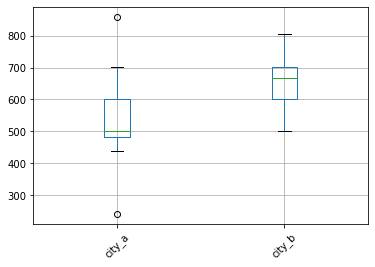

In [138]:
import pandas as pd
df = pd.DataFrame({
    'city_a': [240, 440, 455, 475, 475, 490, 490, 500, 500, 500, 530, 550, 578, 580, 620, 687, 694, 703, 859],
    'city_b': [500, 564, 590, 600, 600, 600, 645, 650, 660, 667, 689, 692, 700, 700, 705, 735, 760, 764, 805]
})

boxplot = df.boxplot(column=['city_a', 'city_b'], grid=True, rot=45, fontsize=10)

value    38.0
dtype: float64

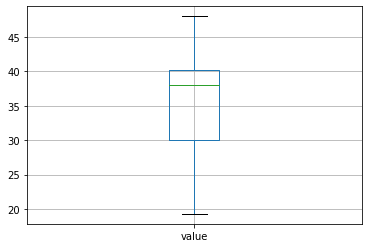

In [144]:
# В Python постройте boxplot на предложенном в предыдущей задаче наборе данных:
data = pd.DataFrame({
  'value': [48, 44, 42.5, 40.5, 40.5, 39, 39, 38, 38, 38, 35, 33, 30.2, 30, 26, 19.3, 27, 21]
})
data.boxplot()

# Найдите на графике отображение медианы. Чему она равна?
# Используйте data.median(axis=0) для нахождения численного значения медианы.
data.median(axis=0)

<AxesSubplot:>

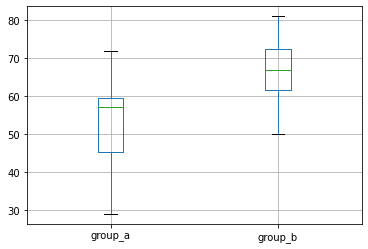

In [145]:
import pandas as pd


df = pd.DataFrame({
    'group_a': [72, 66, 63.75, 60.75, 60.75, 58.5, 58.5, 57, 57, 57, 52.5, 49.5, 45.3, 45, 39, 28.95, 40.5, 31.5, 49],
    'group_b': [71, 72, 60, 50, 57, 77, 81, 58, 62, 61, 73, 74, 76, 65, 66, 67, 67, 67, 69]
})

df.boxplot()